# Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Double Checking The Data

In [3]:
df = pd.read_csv(r'C:\Users\aiswa\Final-Project-Hotel-Cancellation-Prediction\Flask\data\hotel_final.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0


In [4]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                      0
arrival_month               

In [5]:
df['booking_location_encoded'] =df['booking_location'].map({'International':1, 'Local':0})
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})

# preprocessing label using .map because there are only 2 unique values

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,booking_location_encoded,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0,1,0


In [7]:
import dython
from dython.nominal import associations



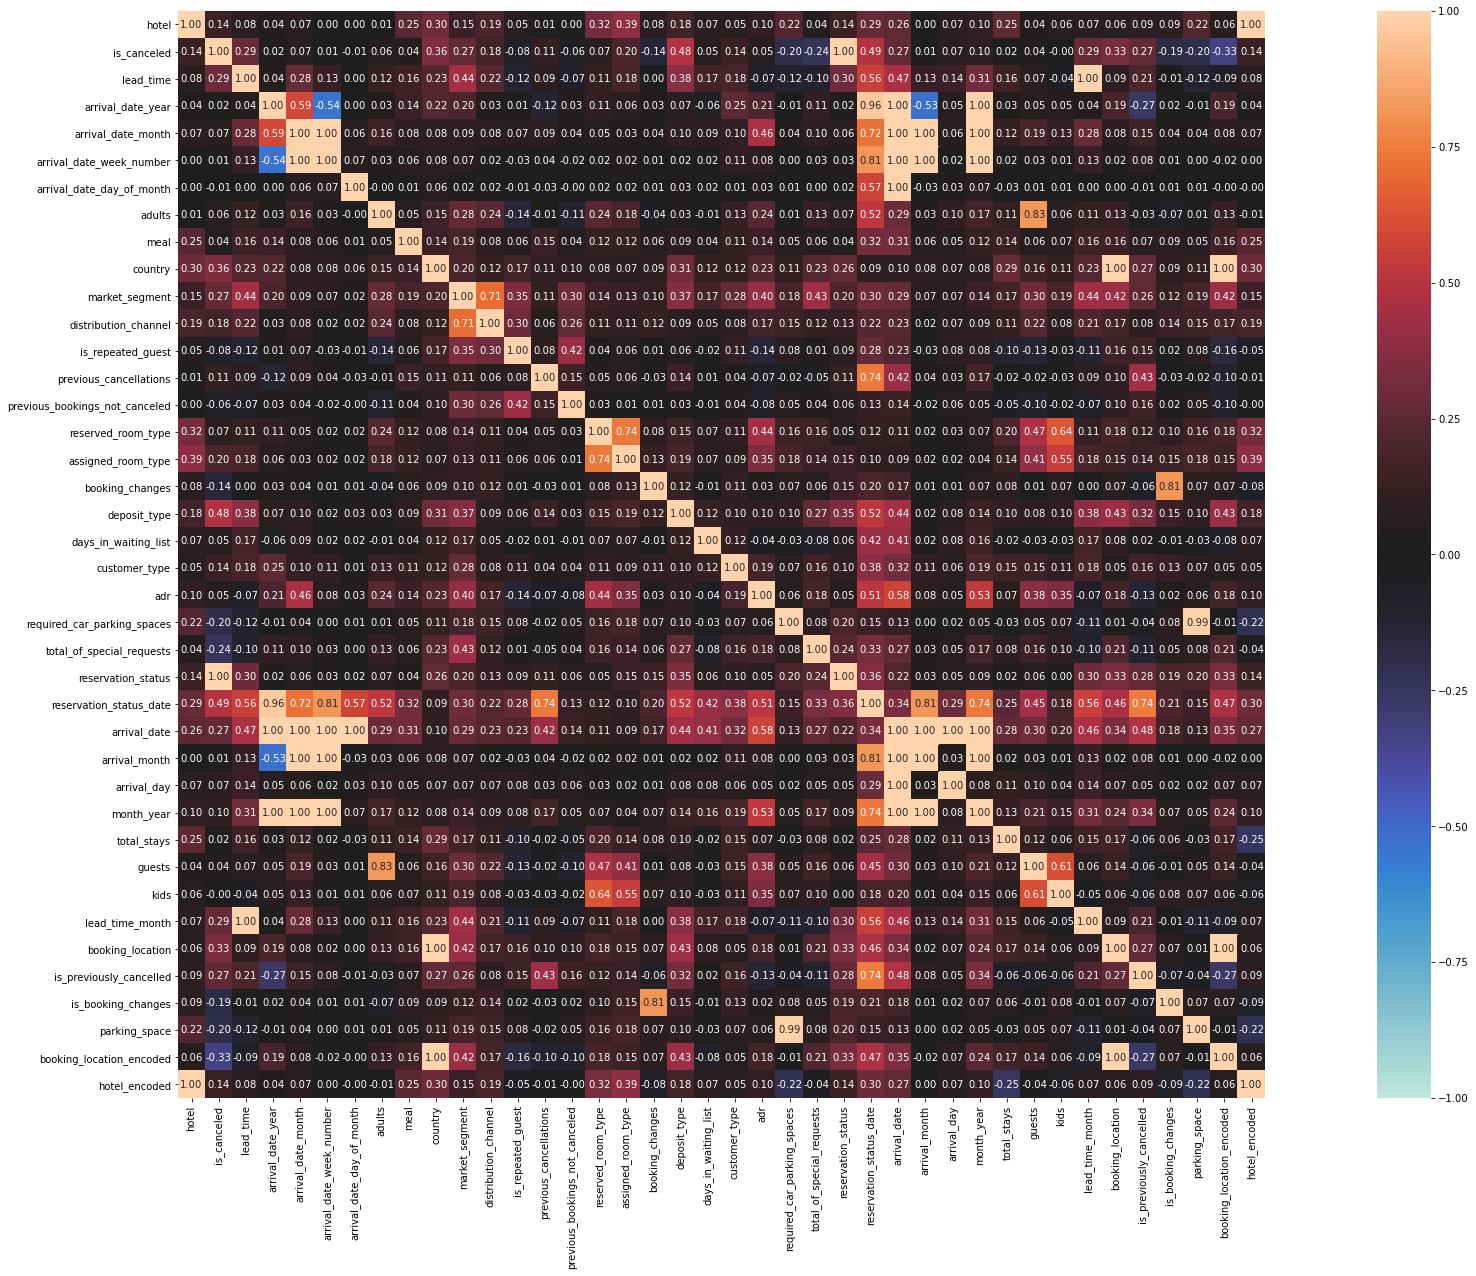

In [8]:
associations(df, figsize = (40, 20))
plt.show()

# we se that iscanceled have 1.00 cancellation have 1.00 correlation with reservationn status so will not use reservation status
# as reservation status tell you is the booking already canceled or check out or no show 
# and reservation status date will be dropped as well as our goals is to predict

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,booking_location_encoded,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0,1,0


- lead time = 0.29
    - numerical
    
    
- booking location = 0.33
    - label categorical (binary)
   


- country = 0.36
    - categorical one hot encoding
    
    
- market segment = 0.27
    - categorical one hot encoding


- deposit type = 0.48
    - categorical one hot encoding


- parking_space = -0.2
    - numerical encoding
    
    

- total_special_request = -0.24
    - numerical

- is previously cancelled = 0.27
    - numerical

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,booking_location_encoded,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0,1,0


## Model Building

In [12]:
X = df[['hotel_encoded','booking_location_encoded','lead_time', 'market_segment', 'deposit_type', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'customer_type', 'total_stays', 'guests']]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [13]:
X_train.head()

,hotel_encoded,booking_location_encoded,lead_time,market_segment,deposit_type,parking_space,total_of_special_requests,is_previously_cancelled,is_repeated_guest,is_booking_changes,customer_type,total_stays,guests
111811,1,0,30,Direct,No Deposit,0,1,0,0,1,Transient,1,3.0
18678,0,0,15,Corporate,No Deposit,0,0,1,0,0,Transient-Party,2,2.0
25566,0,1,160,Offline TA/TO,No Deposit,0,0,0,0,0,Transient,7,2.0
52665,1,1,88,Online TA,No Deposit,0,0,0,0,0,Transient,3,2.0
88106,1,0,56,Complementary,No Deposit,0,0,0,0,0,Transient,1,2.0


In [14]:
cat_columns = ['market_segment','deposit_type','customer_type']
num_columns = ['hotel_encoded','booking_location_encoded','lead_time', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'total_stays', 'guests']

In [15]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])

# this is preparring all the the pipeline model to predict all using few algorithm and we will hypertune it using
# the algorithm that we set up as well

### Logistic Regression

In [16]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base =  pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [17]:
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)

print(f"Training Accuracy : {acc_logreg_base_train}")
print(f"Testing Accuracy : {acc_logreg_base}")

# we see here that the model is not over fit or underfitting using logistic regression model

Training Accuracy : 0.8024120687481615
Testing Accuracy : 0.8041349749968484


In [18]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85     14974
           1       0.81      0.62      0.70      8823

    accuracy                           0.80     23797
   macro avg       0.81      0.77      0.78     23797
weighted avg       0.80      0.80      0.80     23797



In [19]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_base

,Prediksi 1,Prediksi 0
aktual 1,5428,3395
aktual 0,1266,13708


<AxesSubplot:>

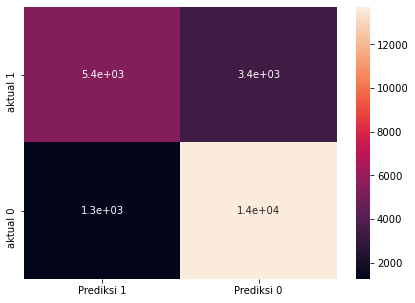

In [20]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)

# we see that using logistic regression we have around 1200 ++ false positive in this case (not cancelled booking) thats predicted
# to be cancelled
# and we have around 3300 ++ False Negative means (cancelled booking that's considered not cancelled)

### KNN

In [21]:
pipe_KNN.fit(X_train, y_train)
y_pred_KNN_base =  pipe_KNN.predict(X_test)
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [22]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
acc_KNN_base_train = accuracy_score(y_train, y_pred_KNN_base_train)

print(f"Training Accuracy : {acc_KNN_base_train}")
print(f"Testing Accuracy : {acc_KNN_base}")

# in KNN model we see that there is overfitting condition in KNN model
# even though KNN has a better accuracy score compared to logistic Regression
# we will fix it later on in hyperparameter tuning

Training Accuracy : 0.8796276841618691
Testing Accuracy : 0.8353994200949699


In [23]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14974
           1       0.80      0.74      0.77      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.82     23797
weighted avg       0.83      0.84      0.83     23797



In [24]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_base

,Prediksi 1,Prediksi 0
aktual 1,6552,2271
aktual 0,1646,13328


<AxesSubplot:>

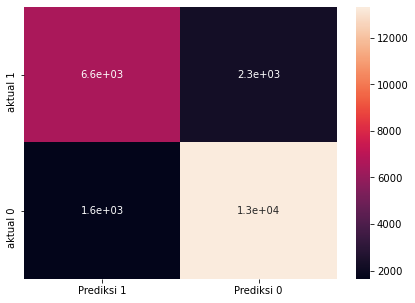

In [25]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_KNN_base, annot = True)

# compared to logistic regression KNN model has a lower False negative (not cancelled prediction actual  canceled)
# however it has a higher False Positive (prediction cancelled actual not cancelled)

### Decision Tree

In [26]:
pipe_DT.fit(X_train, y_train)
y_pred_DT_base =  pipe_DT.predict(X_test)
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [27]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
acc_DT_base_train = accuracy_score(y_train, y_pred_DT_base_train)

print(f"Training Accuracy : {acc_DT_base_train}")
print(f"Testing Accuracy : {acc_DT_base}")

# we see that there's overfitting condition in Decision Tree as well 
# however we will try to adjust the parameter to prevent the overfitting condition

Training Accuracy : 0.9419779804176998
Testing Accuracy : 0.8317014749758372


In [28]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14974
           1       0.79      0.75      0.77      8823

    accuracy                           0.83     23797
   macro avg       0.82      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



In [29]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT_base

,Prediksi 1,Prediksi 0
aktual 1,6591,2232
aktual 0,1773,13201


<AxesSubplot:>

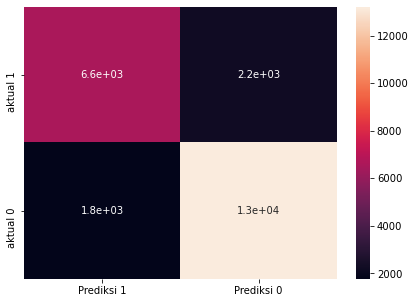

In [30]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_DT_base, annot = True)


### Random Forest

In [31]:
pipe_RF.fit(X_train, y_train)
y_pred_RF_base =  pipe_RF.predict(X_test)
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [32]:
recall_RF_base = recall_score(y_test, y_pred_RF_base)
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
precision_RF_base = precision_score(y_test, y_pred_RF_base)
f1_RF_base = f1_score(y_test, y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train, y_pred_RF_base_train)

print(f"Training Accuracy : {acc_RF_base_train}")
print(f"Testing Accuracy : {acc_RF_base}")

# we also have an overfitting condition for Random Forest model as well in this case 
# we also will fix it later on the hyperparameter tuning

Training Accuracy : 0.9419464638399798
Testing Accuracy : 0.841450603017187


In [33]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14974
           1       0.80      0.77      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



In [34]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels = [1,0])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_RF_base

,Prediksi 1,Prediksi 0
aktual 1,6750,2073
aktual 0,1700,13274


<AxesSubplot:>

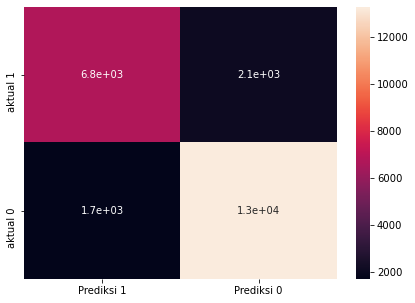

In [35]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_RF_base, annot = True)

In [36]:
pipe_XGB.fit(X_train, y_train)
y_pred_XGB_base =  pipe_XGB.predict(X_test)
y_pred_XGB_base_train = pipe_XGB.predict(X_train)

[22:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
recall_XGB_base = recall_score(y_test, y_pred_XGB_base)
acc_XGB_base = accuracy_score(y_test, y_pred_XGB_base)
precision_XGB_base = precision_score(y_test, y_pred_XGB_base)
f1_XGB_base = f1_score(y_test, y_pred_XGB_base)
acc_XGB_base_train = accuracy_score(y_train, y_pred_XGB_base_train)

print(f"Training Accuracy : {acc_XGB_base_train}")
print(f"Testing Accuracy : {acc_XGB_base}")


Training Accuracy : 0.8594780854729588
Testing Accuracy : 0.8489725595663319


In [38]:
print(classification_report(y_test, y_pred_XGB_base))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14974
           1       0.83      0.75      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.84      0.83      0.83     23797
weighted avg       0.85      0.85      0.85     23797



In [39]:
cm_XGB_base = confusion_matrix(y_test, y_pred_XGB_base, labels = [1,0])
df_XGB_base = pd.DataFrame(data = cm_XGB_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_XGB_base

,Prediksi 1,Prediksi 0
aktual 1,6602,2221
aktual 0,1373,13601


<AxesSubplot:>

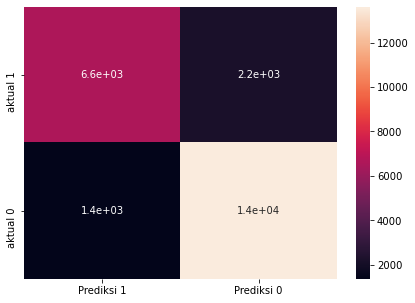

In [40]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_XGB_base, annot = True)

### Evaluation Comparing Each Models Evaluation Matrix 

In [41]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [42]:
evaluation_matrix_base = {
    'Logistic Regression': [acc_logreg_base, recall_logreg_base, precision_logreg_base, f1_logreg_base],
    'KNN':[acc_KNN_base,recall_KNN_base,precision_KNN_base, f1_KNN_base],
    'Decision Tree':[acc_DT_base, recall_DT_base, precision_DT_base, f1_DT_base],
    'Random Forest':[acc_RF_base, recall_RF_base, precision_RF_base, f1_RF_base],
    'XGB':[acc_XGB_base, recall_XGB_base, precision_XGB_base, f1_XGB_base]
}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_base_training = {
    "training" : [acc_logreg_base_train, acc_KNN_base_train, acc_DT_base_train, acc_RF_base_train, acc_XGB_base_train],
    "testing": [acc_logreg_base, acc_KNN_base, acc_DT_base, acc_RF_base, acc_XGB_base]
}
    

eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'])

display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])



# we see that from the evaluation matrix Decision Tree and Random Forest has the highest score in training 
# however we see that both algorithm has an overfitting condition 
# same goes to KNN it also have an overfitting condition 

# the only algorithm that doesn't have an overfitting condition is Logistic Regression & XGB
# however we will do hyperparameter tuning on all of them to fix the overfitting condition

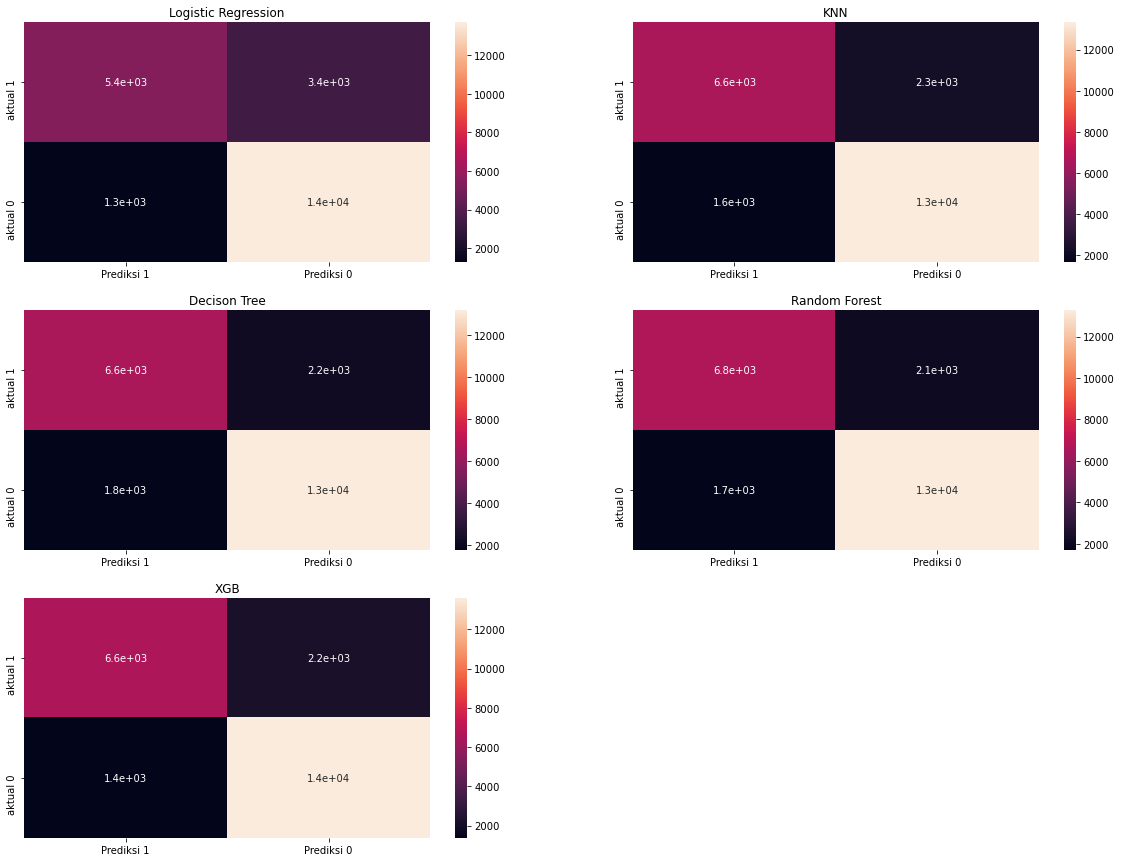

In [43]:
# confusion Matrix Figure For All The Chart 

plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_base, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(df_RF_base, annot = True)
plt.title('Random Forest')

plt.subplot(3,2,5)
sns.heatmap(df_XGB_base, annot = True)
plt.title("XGB")

plt.show()

# we will focus on 2 algorithms that doesn't have overfitting condition (Logistic Regression & XGB)

# XGB :
# XGB has more False Positive compared to XGB (predicting cancellation actually not cancelled)
# this might lead into overbooking for the hotel side (more booking compared to the hotel rooms)


# Logistic Regression : 
# Logistic Regression has more false negative compared to XGB (Preidiction not canceled actually canceled)
# this might lead into messing up revenue management (lower adr rate) or maybe even leads into unsold rooms due to cancellation 


### Testing With New Data

In [44]:
data_arif = {
    "nama" : "Arif",
    "Sex" : "male",
    "Age" : 28,
    "hotel_encoded" : 1,
    "booking_location_encoded" : 1,
    "lead_time" : 200,
    "market_segment" : "Direct",
    'deposit_type': 'No Deposit',
    'parking_space':1,
    'total_of_special_requests':1,
    'is_previously_cancelled':1,
    'is_repeated_guest':0,
    'is_booking_changes':0,
    'customer_type':'Transient',
    'total_stays': 2,
    'guests': 2.0,
    "Email" : "arif@titanic.com"
}

arif = pd.DataFrame(data = data_arif, index = [1])
pipe_XGB.predict_proba(arif)

# we see that our model could predict new data that's outside the training and testing set 
# we use XGB and predict proba in this case, we that arif is 95% will likely to confirmed booking  

array([[0.9545188 , 0.04548121]], dtype=float32)

### Hyperparameter Tuning


#### Logistic Regression 

In [45]:
pipe_logreg.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('categorical',
                                    Pipeline(memory=None,
                                             steps=[('encoder',
                                                     OneHotEncoder(categories='auto',
                                                                   drop=None,
                                                                   dtype=<class 'numpy.float64'>,
                                                                   handle_unknown='error',
                                                                   sparse=True))],
                                             verbose=False),
                                    ['market_segment', 'deposit_type',
                                     'customer_type']),
                                   ('numerica

In [46]:
param_logreg = {
    'algo__penalty':['l2', 'l1', 'elasticnet'],
    'algo__C':[1.0, 2.0, 3.0, 0.5, 0.1],
    'algo__class_weight':[None, 'balanced']
}

model_logreg = GridSearchCV(estimator=pipe_logreg, param_grid=param_logreg, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   39.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('encoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                      

In [47]:
logreg_tuned = model_logreg.best_estimator_
logreg_tuned_train = model_logreg.best_score_
y_pred_logreg_tuned = logreg_tuned.predict(X_test) 

In [48]:
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned_train = logreg_tuned_train

print(f"Training Accuracy : {acc_logreg_tuned_train}")
print(f"Testing Accuracy : {acc_logreg_tuned}")


# logistic regression doesn't have an overfitting condition from the based model however it seems doesn't effect the accuracy of it


Training Accuracy : 0.8025906726882073
Testing Accuracy : 0.8040089086859689


In [49]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85     14974
           1       0.81      0.61      0.70      8823

    accuracy                           0.80     23797
   macro avg       0.81      0.76      0.78     23797
weighted avg       0.80      0.80      0.80     23797



In [50]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_logreg_base, df_logreg_tuned], ['Base Model', 'Tuned Model'])

# we see that comparing both of the model we see that base model has a slightly more True Positive 
# while tuned model has slightly more True Negative and and slightly less true  true positive

,Prediksi 1,Prediksi 0
aktual 1,5428,3395
aktual 0,1266,13708
,Prediksi 1,Prediksi 0
aktual 1,5415,3408
aktual 0,1256,13718


Text(0.5, 1.0, 'Tuned Model')

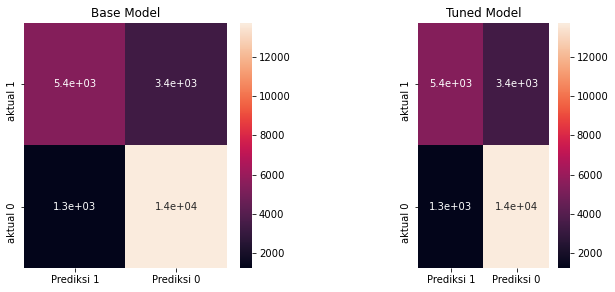

In [51]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_logreg_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_logreg_tuned, annot = True)
plt.title('Tuned Model')

#### KNN 

In [52]:
pipe_KNN.get_params()



{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('categorical',
                                    Pipeline(memory=None,
                                             steps=[('encoder',
                                                     OneHotEncoder(categories='auto',
                                                                   drop=None,
                                                                   dtype=<class 'numpy.float64'>,
                                                                   handle_unknown='error',
                                                                   sparse=True))],
                                             verbose=False),
                                    ['market_segment', 'deposit_type',
                                     'customer_type']),
                                   ('numerica

In [53]:
param_KNN = {
    'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
    'algo__weights':['uniform', 'distance'],
    'algo__p':[2,1]
}

model_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_KNN, cv = 3, n_jobs = -1, verbose = 1)
model_KNN.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 30.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('encoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                      

In [55]:
KNN_tuned = model_KNN.best_estimator_
KNN_tuned_train = model_KNN.best_score_
y_pred_KNN_tuned = KNN_tuned.predict(X_test) 

In [56]:
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
f1_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned_train = KNN_tuned_train

print(f"Training Accuracy : {acc_KNN_tuned_train}")
print(f"Testing Accuracy : {acc_KNN_tuned}")


# we see now that KNN doesn't have an overfitting condition and KNN have a better accuracy score compared to logistic regression 
# we also see that after hyperparameter tuning KNN has a better testing score compared to it's based model


Training Accuracy : 0.8388347234991856
Testing Accuracy : 0.8443501281674161


In [57]:
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14974
           1       0.82      0.74      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.84      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



In [58]:
cm_KNN_tuned = confusion_matrix(y_test, y_pred_KNN_tuned, labels = [1,0])
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_KNN_base, df_KNN_tuned], ['Base Model', 'Tuned Model'])

# we can see from the confusion matrix we see that improvement compared to the based model
# we see that there is slight improvement on True Positive and slight improvement on the true Negative as well

,Prediksi 1,Prediksi 0
aktual 1,6552,2271
aktual 0,1646,13328
,Prediksi 1,Prediksi 0
aktual 1,6565,2258
aktual 0,1446,13528


Text(0.5, 1.0, 'Tuned Model')

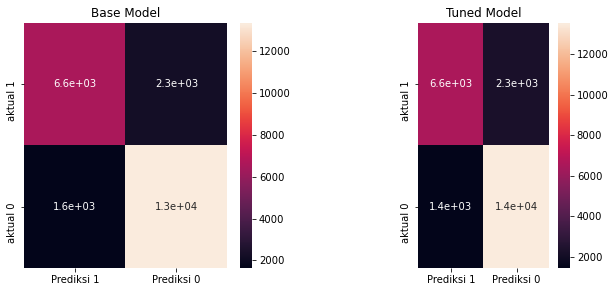

In [59]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_KNN_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_KNN_tuned, annot = True)
plt.title('Tuned Model')

### Decision Tree

In [60]:
param_DT = {
    'algo__min_samples_split': [2,1,3,4,6,8,10,],
    'algo__max_depth': [None,1,2,4,8,10,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,5,8]
}

model_DT = GridSearchCV(estimator=pipe_DT, param_grid=param_DT, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_DT.fit(X_train, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('encoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                      

In [61]:
DT_tuned = model_DT.best_estimator_
DT_tuned_train = model_DT.best_score_
y_pred_DT_tuned = DT_tuned.predict(X_test) 

In [62]:
recall_DT_tuned = recall_score(y_test, y_pred_DT_tuned)
acc_DT_tuned = accuracy_score(y_test, y_pred_DT_tuned)
precision_DT_tuned = precision_score(y_test, y_pred_DT_tuned)
f1_DT_tuned = f1_score(y_test, y_pred_DT_tuned)
acc_DT_tuned_train = DT_tuned_train

print(f"Training Accuracy : {acc_DT_tuned_train}")
print(f"Testing Accuracy : {acc_DT_tuned}")


Training Accuracy : 0.8361453008098567
Testing Accuracy : 0.8398117409757533


In [63]:
print(classification_report(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14974
           1       0.81      0.75      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



In [64]:
cm_DT_tuned = confusion_matrix(y_test, y_pred_DT_tuned, labels = [1,0])
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_DT_base, df_DT_tuned], ['Base Model', 'Tuned Model'])


,Prediksi 1,Prediksi 0
aktual 1,6591,2232
aktual 0,1773,13201
,Prediksi 1,Prediksi 0
aktual 1,6610,2213
aktual 0,1599,13375


Text(0.5, 1.0, 'Tuned Model')

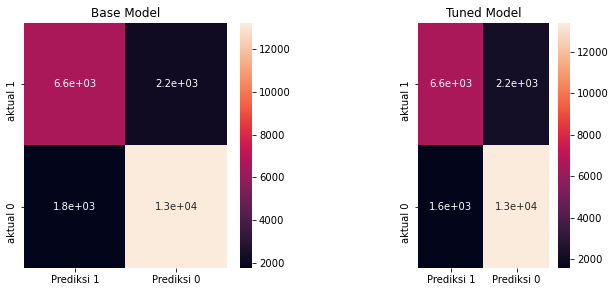

In [65]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_DT_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_DT_tuned, annot = True)
plt.title('Tuned Model')

### Random Forest 

In [66]:
param_RF = {
    'algo__min_samples_split': [2,3,4,6,8,10],
    'algo__max_depth': [None,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,8],
    'algo__max_leaf_nodes':[None, 1,2,4]
}

model_RF = GridSearchCV(estimator=pipe_RF, param_grid=param_RF, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 49.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('encoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                      

In [67]:
RF_tuned = model_RF.best_estimator_
RF_tuned_train = model_RF.best_score_
y_pred_RF_tuned = RF_tuned.predict(X_test) 

In [68]:
recall_RF_tuned = recall_score(y_test, y_pred_RF_tuned)
acc_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
precision_RF_tuned = precision_score(y_test, y_pred_RF_tuned)
f1_RF_tuned = f1_score(y_test, y_pred_RF_tuned)
acc_RF_tuned_train = RF_tuned_train

print(f"Training Accuracy : {acc_RF_tuned_train}")
print(f"Testing Accuracy : {acc_RF_tuned}")

# from all the algorith that we tested so far we see that Random Forest has the highest accuracy among all of the algorithm 
# and now the tuned Random Forest doesn't have overfitting condition compared to the base model 

Training Accuracy : 0.8528491009110599
Testing Accuracy : 0.8532588141362356


In [69]:
print(classification_report(y_test, y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     14974
           1       0.83      0.76      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.85      0.83      0.84     23797
weighted avg       0.85      0.85      0.85     23797



In [70]:
cm_RF_tuned = confusion_matrix(y_test, y_pred_RF_tuned, labels = [1,0])
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_RF_base, df_RF_tuned], ['Base Model', 'Tuned Model'])

# from the comparison with the base model in term of the accuracy the tuned model has a slightly higher accuracy and 
# it doesn't have overfitting condition 
# but we see from the confusion matrix we see that tuned random forest has a slightly lower TRUE POSITIVE 
# (prediction cancelled & actully cancelled)
# compared to the based model


# Tuned Version of Random Forest also have a slightly higher FN (False Negative)
# (Prediction Not Canceled actually Cancelled)

# however the tuned model has a lower False Positive and Higher True Negative compared to the based model 
# that resulted in higer accuracy

,Prediksi 1,Prediksi 0
aktual 1,6750,2073
aktual 0,1700,13274
,Prediksi 1,Prediksi 0
aktual 1,6683,2140
aktual 0,1352,13622


Text(0.5, 1.0, 'Tuned Model')

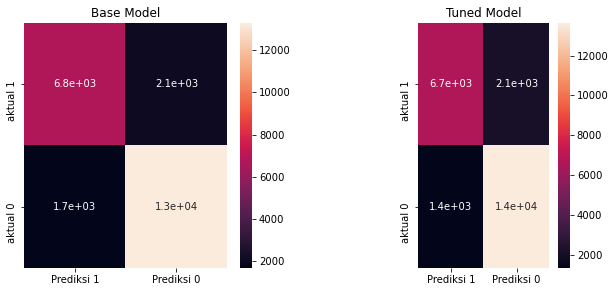

In [71]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_RF_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_RF_tuned, annot = True)
plt.title('Tuned Model')

### XGB 

In [72]:
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('categorical',
                                    Pipeline(memory=None,
                                             steps=[('encoder',
                                                     OneHotEncoder(categories='auto',
                                                                   drop=None,
                                                                   dtype=<class 'numpy.float64'>,
                                                                   handle_unknown='error',
                                                                   sparse=True))],
                                             verbose=False),
                                    ['market_segment', 'deposit_type',
                                     'customer_type']),
                                   ('numerica

In [73]:
param_XGB = {
    'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
    'algo__max_depth': [6, 8, 10, 12],
    'algo__gamma':[0,1,2,3]
}

model_XGB = GridSearchCV(estimator=pipe_XGB, param_grid=param_XGB, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 16.9min finished


[00:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('encoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                      

In [74]:
XGB_tuned = model_XGB.best_estimator_
XGB_tuned_train = model_XGB.best_score_
y_pred_XGB_tuned = XGB_tuned.predict(X_test) 

In [75]:
recall_XGB_tuned = recall_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned = accuracy_score(y_test, y_pred_XGB_tuned)
precision_XGB_tuned = precision_score(y_test, y_pred_XGB_tuned)
f1_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned_train = XGB_tuned_train

print(f"Training Accuracy : {acc_XGB_tuned_train}")
print(f"Testing Accuracy : {acc_XGB_tuned}")

# compared to the base model XGB tuned model has a slightly better accuracy score 
#we will check the confusion matrix comparison between the base model and the tuned model 

Training Accuracy : 0.8513993509172257
Testing Accuracy : 0.8504853552968862


In [76]:
print(classification_report(y_test, y_pred_XGB_tuned))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14974
           1       0.83      0.75      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.85      0.83      0.84     23797
weighted avg       0.85      0.85      0.85     23797



In [77]:
cm_XGB_tuned = confusion_matrix(y_test, y_pred_XGB_tuned, labels = [1,0])
df_XGB_tuned = pd.DataFrame(data = cm_XGB_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_XGB_base, df_XGB_tuned], ['Base Model', 'Tuned Model'])

# from the comparison of both confusion matrix we see that 
# the tuned model has a slightly higher TP (True Positive)
# prediction canceled actual canceled

# the tuned model also has a lower FN (False Negative)
# prediction not cancelled actual cancelled


# both the tuned and the base model has almost similar False Positive & True Negative value

,Prediksi 1,Prediksi 0
aktual 1,6602,2221
aktual 0,1373,13601
,Prediksi 1,Prediksi 0
aktual 1,6639,2184
aktual 0,1374,13600


Text(0.5, 1.0, 'Tuned Model')

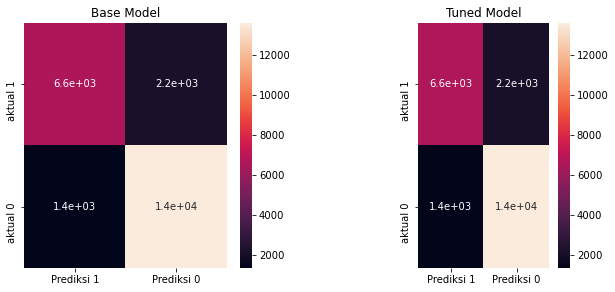

In [78]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_XGB_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_XGB_tuned, annot = True)
plt.title('Tuned Model')

In [79]:
evaluation_matrix_tuned = {
    'Logistic Regression': [acc_logreg_tuned, recall_logreg_tuned, precision_logreg_tuned, f1_logreg_tuned],
    'KNN':[acc_KNN_tuned,recall_KNN_tuned,precision_KNN_tuned, f1_KNN_tuned],
    'Decision Tree':[acc_DT_tuned, recall_DT_tuned, precision_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF_tuned, recall_RF_tuned, precision_RF_tuned, f1_RF_tuned],
    'XGB':[acc_XGB_tuned, recall_XGB_tuned, precision_XGB_tuned, f1_XGB_tuned]
}

eva_tuned = pd.DataFrame(data = evaluation_matrix_tuned, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_tuned_training = {
    "training" : [acc_logreg_tuned_train, acc_KNN_tuned_train, acc_DT_tuned_train, acc_RF_tuned_train, acc_XGB_tuned_train],
    "testing": [acc_logreg_tuned, acc_KNN_tuned, acc_DT_tuned, acc_RF_tuned, acc_XGB_tuned]
}

eva_tuned_train = pd.DataFrame(data = evaluation_matrix_tuned_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'])


### Comparing Each Evaluation Matrix 

#### Base Model

In [80]:
display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])


#### Tuned Model

In [81]:
display_side_by_side([eva_tuned, eva_tuned_train], ['Evaluation Matrix', 'Accuracy Train & Test'])


### Heatmap After Tuning

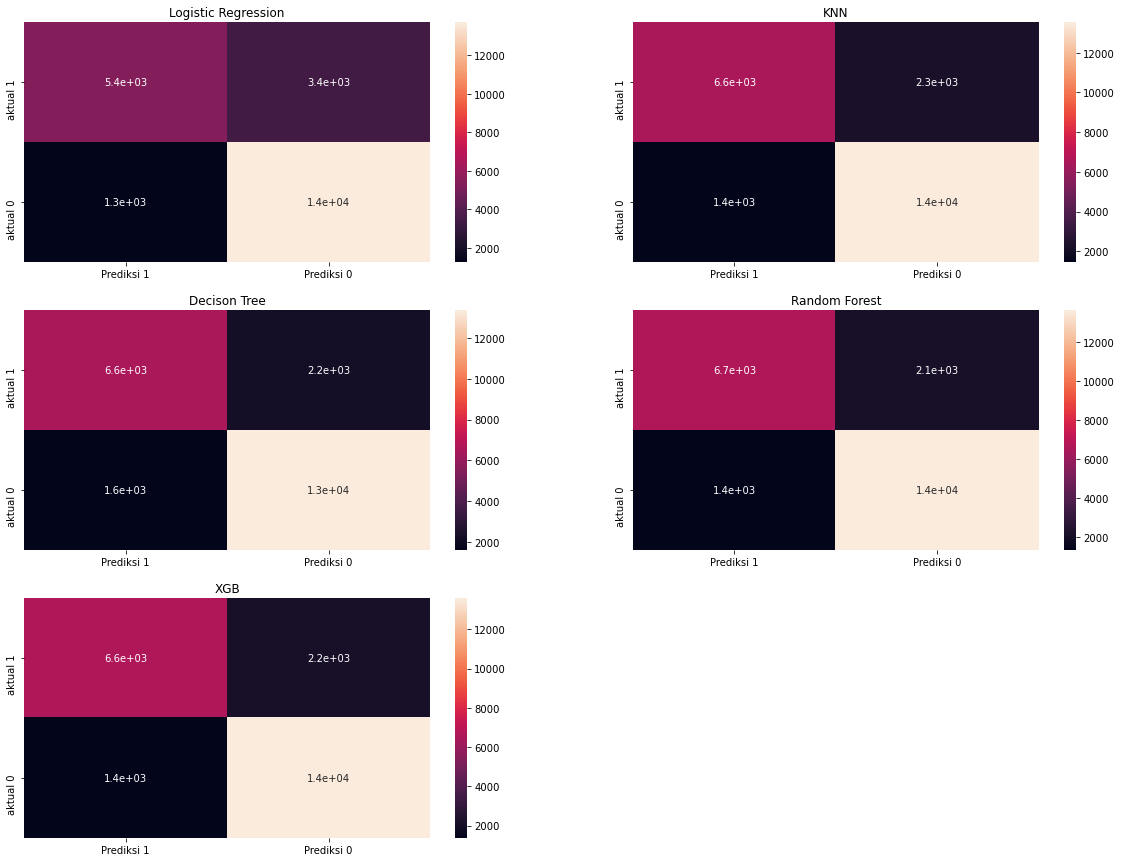

In [82]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_tuned, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_tuned, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_tuned, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(df_RF_tuned, annot = True)
plt.title('Random Forest')

plt.subplot(3,2,5)
sns.heatmap(df_XGB_tuned, annot = True)
plt.title("XGB")

plt.show()


### Conclusion, Limitation & Improvement (Future Research)

*For Exploratory Data Analysis Conclusion Please Check The Other Notebook*


#### Conclusion

- **Tuned Random Forest Has The Best Accuracy Among All Algorithm That We Tried**
    - From all the evaluation matrix to predict hotel cancellation classification case, we see that  **Tuned Random Forest** has the best accuracy when it comes to predicting hotel cancellation based on certain features **(85.2 %)**


- **Reservation Status Column**
    - Reservation Status have 1.00 Association Value with the Target, because of the reservation status will tell whether the booking has been canceled, no show or checkout, using this column to build a model is prohibitted because you won't be able to predict future booking, since the future booking still doesn't have it status yet
    
    
    
- **Overfitting**
    - For the base model we see that there are only 2 algorithms that doesn't have an overfitting condition **(Logistic Regression & XGB)**
    
    - After Hyperparameter Tuning on all algorithm all of the algorithm don't have an overfitting condition, and after hyperparameter tuning **(Random Forest)** has the highest accuracy score 



- **Using Accuracy As The Primary Evaluation Metrics**

    1. The First Reason Why Accuracy is used as the evaluation metric here because we have somehow a balance data **63 % Confirmed Booking** and **37% Canceled Booking** in this case our dataset is balance and hence using accuracy is acceptable in this case 
    2. in this case **every class is equally important** 
    
    
- **How This Model Will Help Hotels ?**

    - this model will allow hotel managers / revenue manager to take actions on bookings that's identified as "potentially going to be canceled", **furthermore the development of these model should contribute to hotel revenue management.**
    - **These prediction models enable hotel managers to mitigate revenue loss derived from booking cancellations and to mitigate the risks associated with overbooking (reallocation costs, cash or service compensations, and, particularly important today, social reputation costs)**. Booking cancellations models also allow hotel managers to **implement less rigid cancellation policies, without increasing uncertainty**. This has the potential to translate into more sales, since less rigid cancellation policies generate more bookings

### Limitation & Future Research 




- The machine learning model in this notebook implemented data from **City & Resort Hotels** in Portugal, which raise some question that further research will help to explain:



- **1**.**Can a similar result obtained from hotel outside of portugal ?**
- **2. Can Model have a better result if more hotels are integrated into the machine learning modeling?**
- **3. Is the result only specific of the type of hotels integrated into this modeling?**


- **Situation Limitation**
    - all of this booking are recording during 2015 - 2017, however now in 2020 we have a pandemic that's going on **(Covid - 19)**, this model needs to be double checked for current situation wheter a similar result obtained after the pandemic 

#### Further Research

- For further research weather information, hotel factors (star of the hotels, brand, and etc) could be included into the dataset in hope to  improve the models and measure the importance of these features


- Additional research with different location, additional hotel could contribute to a better understanding of booking cancellations

### Exporting The Models

In [83]:
joblib.dump(RF_tuned, 'hotel_tuned')

['hotel_tuned']